In [4]:
import pandas as pd
import numpy as np
import requests

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.cluster.hierarchy import linkage, dendrogram


In [5]:
air_pollution_df = pd.DataFrame(pd.read_csv('../Resources/aqi_data.csv'))

In [6]:
# Display sample data to confirm that the coordinates appear
air_pollution_df.head()

,country,city,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,Lat,Lon
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.745212,44.193819
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.295918,-41.987157
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.157930,15.186029
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.019022,20.880403
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,-17.592920,-149.606367


In [7]:
# Assuming air_pollution_df is your DataFrame
num_rows, num_columns = air_pollution_df.shape

print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")


The DataFrame has 23036 rows and 14 columns.


In [8]:
# Exploring countries and cities having the most critical pollution level

# Define lists of numeric and string column names
num_cols_list = ['aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']  
str_cols_list = ['country', 'city', 'aqi_category', 'co_aqi_category', 'ozone_aqi_category', 'no2_aqi_category', 'pm2.5_aqi_category']

# Print code for further aggregation of numeric columns
for column in num_cols_list:
    print(f"{column}=('{column}', 'median'),")

# Print code for further aggregation of string columns
for column in str_cols_list:
    print(f"{column}=('{column}', pd.Series.mode),")


aqi_value=('aqi_value', 'median'),
co_aqi_value=('co_aqi_value', 'median'),
ozone_aqi_value=('ozone_aqi_value', 'median'),
no2_aqi_value=('no2_aqi_value', 'median'),
pm2.5_aqi_value=('pm2.5_aqi_value', 'median'),
country=('country', pd.Series.mode),
city=('city', pd.Series.mode),
aqi_category=('aqi_category', pd.Series.mode),
co_aqi_category=('co_aqi_category', pd.Series.mode),
ozone_aqi_category=('ozone_aqi_category', pd.Series.mode),
no2_aqi_category=('no2_aqi_category', pd.Series.mode),
pm2.5_aqi_category=('pm2.5_aqi_category', pd.Series.mode),


In [9]:
countries_cities = (
    air_pollution_df.groupby(['country', 'city'])
    .agg(
        # Preprinted code.
        aqi_value=('aqi_value', 'median'),
        co_aqi_value=('co_aqi_value', 'median'),
        ozone_aqi_value=('ozone_aqi_value', 'median'),
        no2_aqi_value=('no2_aqi_value', 'median'),
        pm2_5_aqi_value=('pm2.5_aqi_value', 'median'),  
        # Another set of preprinted code.
        aqi_category=('aqi_category', pd.Series.mode),
        co_aqi_category=('co_aqi_category', pd.Series.mode),
        ozone_aqi_category=('ozone_aqi_category', pd.Series.mode),
        no2_aqi_category=('no2_aqi_category', pd.Series.mode),
        pm2_5_aqi_category=('pm2.5_aqi_category', pd.Series.mode),  
    )
)

countries_cities.head(15)


aqi_value  co_aqi_value  ozone_aqi_value  \
country     city                                                     
Afghanistan Acin               62.0           0.0             46.0   
            Anar Darreh       126.0           1.0             42.0   
            Andarab           104.0           0.0             34.0   
            Asadabad          131.0           1.0             43.0   
            Asmar             151.0           2.0             48.0   
            Aybak              74.0           1.0             41.0   
            Azrow              72.0           0.0             48.0   
            Baglan             72.0           1.0             44.0   
            Bagrami           102.0           1.0             40.0   
            Baraki Barak       67.0           0.0             41.0   
            Cah Ab            123.0           1.0             47.0   
            Carikar            67.0           0.0             37.0   
            Ciras              90.0           0.0             26.0   
            Dawlatabad         92.0           1.0             43.0   
            Deh Rawud          49.0           0.0             49.0   

                          no2_aqi_value  pm2_5_aqi_value  \
country     city                                           
Afghanistan Acin                    0.0             62.0   
            Anar Darreh             0.0            126.0   
            Andarab                 0.0            104.0   
            Asadabad                0.0            131.0   
            Asmar                   1.0            151.0   
            Aybak                   0.0             74.0   
            Azrow                   0.0             72.0   
            Baglan                  0.0             72.0   
            Bagrami                 0.0            102.0   
            Baraki Barak            0.0             67.0   
            Cah Ab                  0.0            123.0   
            Carikar                 0.0             67.0   
            Ciras                   0.0             90.0   
            Dawlatabad              0.0             92.0   
            Deh Rawud               0.0             47.0   

                                            aqi_category co_aqi_category  \
country     city                                                           
Afghanistan Acin                                Moderate            Good   
            Anar Darreh   Unhealthy for Sensitive Groups            Good   
            Andarab       Unhealthy for Sensitive Groups            Good   
            Asadabad      Unhealthy for Sensitive Groups            Good   
            Asmar                              Unhealthy            Good   
            Aybak                               Moderate            Good   
            Azrow                               Moderate            Good   
            Baglan                              Moderate            Good   
            Bagrami       Unhealthy for Sensitive Groups            Good   
            Baraki Barak                        Moderate            Good   
            Cah Ab        Unhealthy for Sensitive Groups            Good   
            Carikar                             Moderate            Good   
            Ciras                               Moderate            Good   
            Dawlatabad                          Moderate            Good   
            Deh Rawud                               Good            Good   

                         ozone_aqi_category no2_aqi_category  \
country     city                                               
Afghanistan Acin                       Good             Good   
            Anar Darreh                Good             Good   
            Andarab                    Good             Good   
            Asadabad                   Good             Good   
            Asmar                      Good             Good   
            Aybak                      Good             Good   
         

In [10]:
countries_cities.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23035 entries, ('Afghanistan', 'Acin') to ('Zimbabwe', 'Zvishavane')
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   aqi_value           23035 non-null  float64
 1   co_aqi_value        23035 non-null  float64
 2   ozone_aqi_value     23035 non-null  float64
 3   no2_aqi_value       23035 non-null  float64
 4   pm2_5_aqi_value     23035 non-null  float64
 5   aqi_category        23035 non-null  object 
 6   co_aqi_category     23035 non-null  object 
 7   ozone_aqi_category  23035 non-null  object 
 8   no2_aqi_category    23035 non-null  object 
 9   pm2_5_aqi_category  23035 non-null  object 
dtypes: float64(5), object(5)
memory usage: 2.0+ MB


In [11]:
countries_cities.columns.to_list()

['aqi_value',
 'co_aqi_value',
 'ozone_aqi_value',
 'no2_aqi_value',
 'pm2_5_aqi_value',
 'aqi_category',
 'co_aqi_category',
 'ozone_aqi_category',
 'no2_aqi_category',
 'pm2_5_aqi_category']

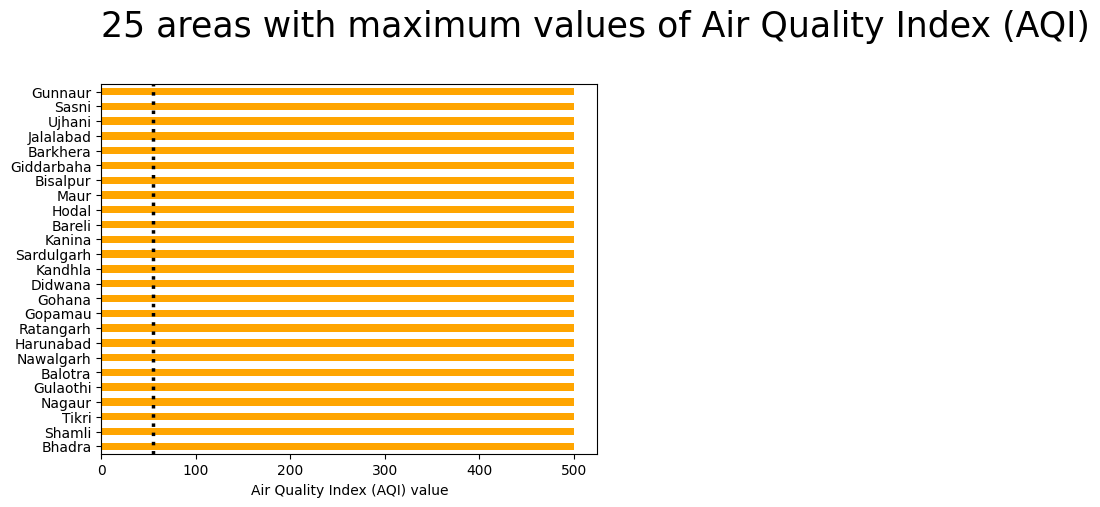

Air Quality Index (AQI)

White dotted line: 55.0 - median value for Air Quality Index (AQI) per city/area within the dataset.
This means, 50% of cities have no more than this.



aqi_value aqi_category
country  city                              
India    Bhadra          500.0    Hazardous
         Ujhani          500.0    Hazardous
         Jalalabad       500.0    Hazardous
         Barkhera        500.0    Hazardous
         Giddarbaha      500.0    Hazardous
         Bisalpur        500.0    Hazardous
         Maur            500.0    Hazardous
         Hodal           500.0    Hazardous
         Bareli          500.0    Hazardous
         Kanina          500.0    Hazardous
         Sardulgarh      500.0    Hazardous
         Sasni           500.0    Hazardous
         Kandhla         500.0    Hazardous
         Gohana          500.0    Hazardous
         Gopamau         500.0    Hazardous
         Ratangarh       500.0    Hazardous
Pakistan Harunabad       500.0    Hazardous
India    Nawalgarh       500.0    Hazardous
         Balotra         500.0    Hazardous
         Gulaothi        500.0    Hazardous
         Nagaur          500.0    Hazardous
         Tikri           500.0    Hazardous
         Shamli          500.0    Hazardous
         Didwana         500.0    Hazardous
         Gunnaur         500.0    Hazardous

In [12]:
# Define the column description list
column_description = [
    ('aqi', 'Air Quality Index (AQI)', 'Air Quality Index (AQI)'),
]

# Loop through each option in column_description
for option in column_description:
    # Use f-strings to request needed columns in the loop.
    column_1 = f'{option[0]}_value'
    column_2 = f'{option[0]}_category'
    
    # Make column name for title
    title_column = option[1]
    
    # Select only these 2 columns, sort values, and extract top 25 entries.
    max_aqi_df = countries_cities[[column_1, column_2]].sort_values(by=column_1, ascending=False).head(25)
    
    # Plot the numeric column.
    max_aqi_df.reset_index().sort_values(by=column_1, ascending=True).plot(
        kind='barh', x='city', y=column_1, color='orange', legend=False
    )
    
    # Add median value to the plot as a line.
    max_aqi_median = countries_cities[column_1].median()
    plt.axvline(x=max_aqi_median, ls=':', lw=2.5, color='black')
    
    # Set plot title, labels, and display the plot
    plt.title(f'25 areas with maximum values of {title_column}\n', fontsize=25, loc='left')
    plt.xlabel(f'{title_column} value')
    plt.ylabel('')
    plt.show()
    
    # Print description and summary information
    print(f'{option[2]}\n')
    print(f'White dotted line: {max_aqi_median} - median value for {title_column} per city/area within the dataset.')
    print('This means, 50% of cities have no more than this.\n')
    
    # Display the table
    display(max_aqi_df)
    
    

Countries with top 25 of the highest Air Quality Index (AQI) level:
- India
- Pakistan

The most polluted areas:
- Bhadra
- Ujhani
- Jalalabad
- Barkhera
- Giddarbaha

Categories for the selected 25 locations:
- Hazardous


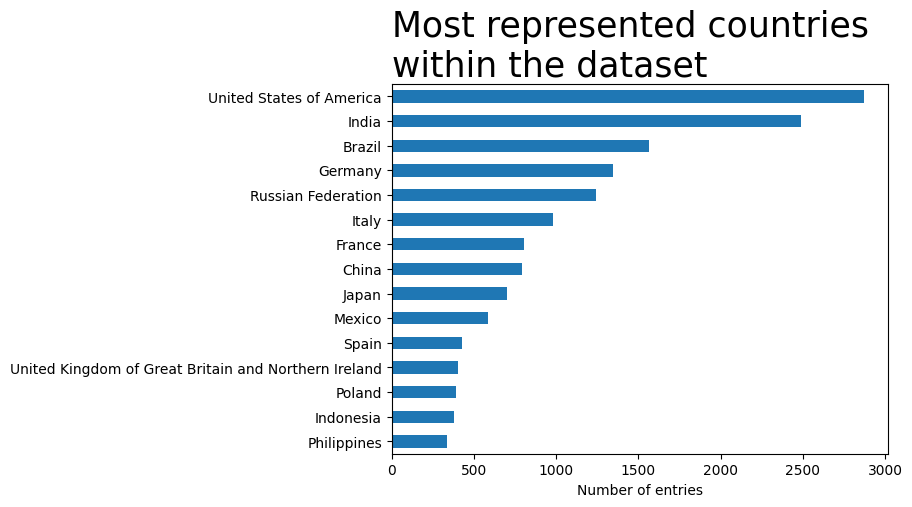

In [13]:
(
    air_pollution_df
    .groupby('country')
    # Count the rows: any column without missing values
    ['aqi_category'].count()
    # Sort values.
    .sort_values(ascending=False)
    # Extract the first 15.
    .head(15)
    # Sort values to have the commonest option at the top.
    .sort_values(ascending=True)
    # Plot the top 15.
    .plot(kind='barh')
)
plt.title('Most represented countries\nwithin the dataset', loc='left', fontsize=25)
# Remove the label for axis Y.
plt.ylabel('')
plt.xlabel('Number of entries')
plt.show()

In [14]:
# Checking values in depth: cities

# Overview the numbers of entries per city.
(
    air_pollution_df
    .groupby('city')
    # Count the rows: any column without missing values
    ['aqi_category'].count()
    # Show the statistics.
    .describe()
)

count    23035.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: aqi_category, dtype: float64

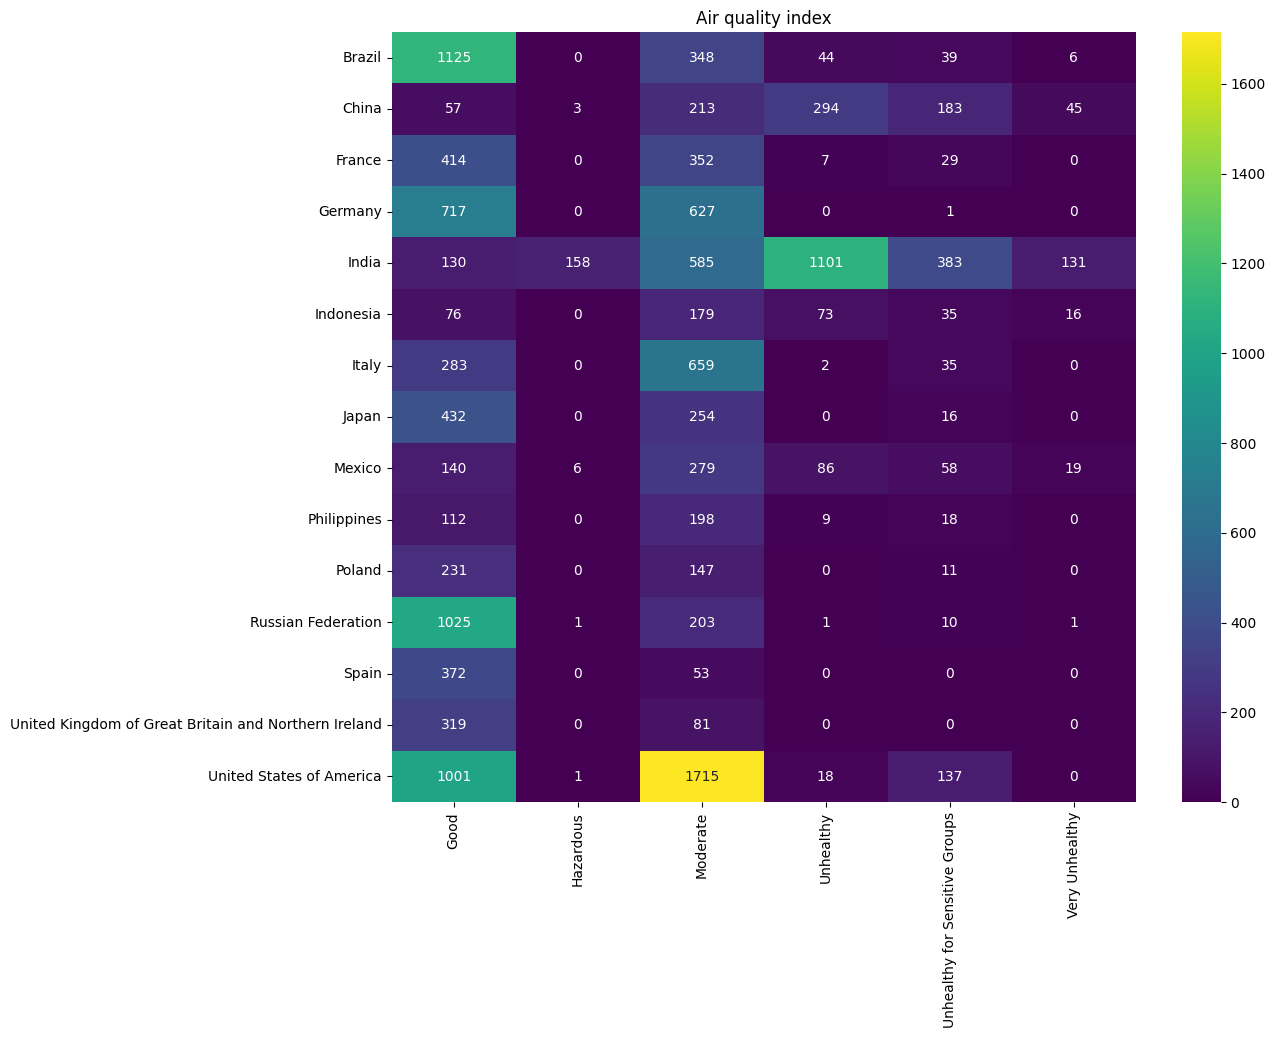

In [15]:
import seaborn as sns

# Function to create heatmap of cities per countries and their AQI categories
def make_heatmap_cities_per_countries_and_categories(list_of_countries, category_column, ylabel, xlabel, plttitle, palette):
    # Filter the DataFrame to include only rows where the country is in the list_of_countries
    filtered_df = air_pollution_df[air_pollution_df['country'].isin(list_of_countries)]
    
    # Pivot the DataFrame to have countries as rows and AQI categories as columns, with counts of cities as values
    pivot_df = filtered_df.pivot_table(index='country', columns=category_column, aggfunc='size', fill_value=0)
    
    # Create the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(pivot_df, annot=True, fmt='d', cmap=palette)
    plt.title(plttitle)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Generate top list of countries with high pollution levels
top_list = (air_pollution_df.groupby('country')['aqi_category']
                            .count()
                            .sort_values(ascending=False)
                            .head(15)
                            .index
                            .to_list())

# Create heatmap
make_heatmap_cities_per_countries_and_categories(
    list_of_countries=top_list,
    category_column='aqi_category',
    ylabel='',
    xlabel='',
    plttitle="Air quality index",
    palette='viridis'
)

